# Machine Learning

Algorithmen die sich durch das Nutzen von Daten automatisch optimieren

Welche Probleme können mit ML gelöst werden?

Kreditwürdigkeit, Preisvorhersagen, Spamfilter, ...

## Überwachtes Lernen

 - Man kennt Daten aus der Vergangenheit (Quadratmeter von Haus, Anzahl Zimmer, Garten vorhanden, ...)
 - Labeled: Man kennt den gewuenschten Output (Man kennt z.B. Preis zu dem Haus in Vergangenheit verkauft wurde. Man will neuen Verkaufspreis schaetzen)
 - Regression Task: Label das man vorhersagen will ist kontinuierlich (z.B. Euro-Preis)
 - Classification Task: Einordnen in eine bestimmte Kategorie (Handschrifterkennung)

## Unüberwachtes Lernen

 - Label nicht vorhanden
 - Label muss selbst gefunden werden

## Unterteilung der Daten
- X: Features (Daten die zur Schaetzung herangezogen werden)
- y: Label (Wert den wir vorhersagen wollen, z.B. Preis einer Taxifahrt)

### Training-Datensatz vs. Test-Datensatz
- Messen der Zuverlaessigkeit des trainierten Modells
- Trainieren mit Tainingsdatensatz und Verifizierung durch Testdatensatz

![title](images/train_test.png)

# Lineare Regression

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1024px-Linear_regression.svg.png" alt="MAE"
	title="Linear Regression" width="500" />

$\hat y = b_{0}x_{0} + ... + b_{n}x_{n}$

Ziel: Finden der $b_{n}$'s für bestee Gerade durch alle Punkte.

### Gradientenverfahren
<img src="https://blog.paperspace.com/content/images/2018/05/gd_basic.png" alt="MAE"
	title="Linear Regression" width="500" />

Source: https://blog.paperspace.com/content/images/2018/05/gd_basic.png

#  Scikit learn
- Beihnhaltet viele Machine Learning Algorithmen
- Algorithmen koennen schnell getauscht werden
- Algorithmen muessen nicht bis in die Tiefe verstanden werden
- Pragmatischer Ansatz

- X_train; y_train
- X_test; y_test

In [9]:
from sklearn.model_selection import train_test_split ##Train-Test-Split erstellen

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y) ##Auch Prozentuale Angabe möglich

In [ ]:
model = from sklearn.model_family import Algorithm ##Importieren eines ML-Algorithmus der auf Daten angewendet wird

In [ ]:
model.fit(X_train, y_train) ##Das Modell wird trainiert

In [ ]:
predictions = model.predict(X_test) ##Vorhersagen für X_test treffen

In [ ]:
performance = error_metric(y_test, predictions) #Vergleich zwischen y_Test und Vorhersagen des Modells mit ausgewählter Error-Metrik

## Erstes kleines ML-Beispiel (ohne Parallelisierung)

Basiert auf folgendem Datensatz: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sys

In [2]:
n = 100  # CSV Einlesen und Datensatz verkleinern --> Nicht gut aber haben auf Jupyter-Node nicht viel Speicher da shared.
df = pd.read_csv('s3://nyc-tlc/trip data/green_tripdata_2019-02.csv', parse_dates=['lpep_pickup_datetime', 'lpep_dropoff_datetime'], header=0, skiprows=lambda i: i % n != 0)
## Beispiel: i=5 --> 5 mod 100 != 0 --> lambda gibt true zurück --> Zeile wird übersprungen

In [3]:
df.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
5751,2,2019-02-28 23:13:53,2019-02-28 23:34:45,N,1,66,255,1,3.89,16.5,0.5,0.5,3.56,0.0,NaN,0.3,21.36,1,1,0.0
5752,2,2019-02-28 23:36:01,2019-02-28 23:45:54,N,1,7,226,4,1.71,8.5,0.5,0.5,0.00,0.0,NaN,0.3,9.80,2,1,0.0
5753,2,2019-02-28 23:57:02,2019-03-01 00:13:08,N,1,25,85,1,4.51,16.5,0.5,0.5,3.56,0.0,NaN,0.3,21.36,1,1,0.0
5754,2,2019-02-28 23:25:30,2019-02-28 23:28:45,N,1,41,74,1,0.80,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2,1,0.0
5755,2,2019-02-28 23:11:10,2019-02-28 23:17:50,N,1,7,260,1,1.13,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5756 entries, 0 to 5755
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               5756 non-null   int64         
 1   lpep_pickup_datetime   5756 non-null   datetime64[ns]
 2   lpep_dropoff_datetime  5756 non-null   datetime64[ns]
 3   store_and_fwd_flag     5756 non-null   object        
 4   RatecodeID             5756 non-null   int64         
 5   PULocationID           5756 non-null   int64         
 6   DOLocationID           5756 non-null   int64         
 7   passenger_count        5756 non-null   int64         
 8   trip_distance          5756 non-null   float64       
 9   fare_amount            5756 non-null   float64       
 10  extra                  5756 non-null   float64       
 11  mta_tax                5756 non-null   float64       
 12  tip_amount             5756 non-null   float64       
 13  tol

In [17]:
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour #Spalte mit 24 Kategorien für 24 Stunden hinzufügen

In [18]:
df['pickup_hour'].tail(500)


5256    16
5257    16
5258    16
5259    16
5260    17
        ..
5751    23
5752    23
5753    23
5754    23
5755    23
Name: pickup_hour, Length: 500, dtype: int64

In [19]:
df['ride_duration'] = df['lpep_dropoff_datetime'].sub(df['lpep_pickup_datetime'], axis=0)

In [20]:
df


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_hour,ride_duration
0,2,2019-02-01 00:06:46,2019-02-01 00:15:20,N,1,82,226,1,1.61,8.0,...,2.79,0.0,NaN,0.3,12.09,1,1,0.0,0,0 days 00:08:34
1,2,2019-02-01 00:39:04,2019-02-01 00:39:49,N,1,82,82,1,0.16,2.5,...,0.00,0.0,NaN,0.3,3.80,2,1,0.0,0,0 days 00:00:45
2,2,2019-02-01 01:01:23,2019-02-01 01:17:05,N,1,7,53,1,7.49,22.5,...,5.95,0.0,NaN,0.3,29.75,1,1,0.0,1,0 days 00:15:42
3,2,2019-02-01 00:44:58,2019-02-01 00:47:17,N,1,25,25,1,0.70,4.0,...,0.00,0.0,NaN,0.3,5.30,1,1,0.0,0,0 days 00:02:19
4,2,2019-02-01 01:48:18,2019-02-01 01:57:17,N,1,134,197,1,3.51,12.0,...,3.99,0.0,NaN,0.3,17.29,1,1,0.0,1,0 days 00:08:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5751,2,2019-02-28 23:13:53,2019-02-28 23:34:45,N,1,66,255,1,3.89,16.5,...,3.56,0.0,NaN,0.3,21.36,1,1,0.0,23,0 days 00:20:52
5752,2,2019-02-28 23:36:01,2019-02-28 23:45:54,N,1,7,226,4,1.71,8.5,...,0.00,0.0,NaN,0.3,9.80,2,1,0.0,23,0 days 00:09:53
5753,2,2019-02-28 23:57:02,2019-03-01 00:13:08,N,1,25,85,1,4.51,16.5,...,3.56,0.0,NaN,0.3,21.36,1,1,0.0,23,0 days 00:16:06
5754,2,2019-02-28 23:25:30,2019-02-28 23:28:45,N,1,41,74,1,0.80,4.5,...,0.00,0.0,NaN,0.3,5.80,2,1,0.0,23,0 days 00:03:15


In [21]:
df['ride_duration_minutes'] = df['ride_duration'].dt.total_seconds().div(60).astype(int)

In [22]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_hour,ride_duration,ride_duration_minutes
0,2,2019-02-01 00:06:46,2019-02-01 00:15:20,N,1,82,226,1,1.61,8.0,...,0.0,NaN,0.3,12.09,1,1,0.0,0,0 days 00:08:34,8
1,2,2019-02-01 00:39:04,2019-02-01 00:39:49,N,1,82,82,1,0.16,2.5,...,0.0,NaN,0.3,3.80,2,1,0.0,0,0 days 00:00:45,0
2,2,2019-02-01 01:01:23,2019-02-01 01:17:05,N,1,7,53,1,7.49,22.5,...,0.0,NaN,0.3,29.75,1,1,0.0,1,0 days 00:15:42,15
3,2,2019-02-01 00:44:58,2019-02-01 00:47:17,N,1,25,25,1,0.70,4.0,...,0.0,NaN,0.3,5.30,1,1,0.0,0,0 days 00:02:19,2
4,2,2019-02-01 01:48:18,2019-02-01 01:57:17,N,1,134,197,1,3.51,12.0,...,0.0,NaN,0.3,17.29,1,1,0.0,1,0 days 00:08:59,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5751,2,2019-02-28 23:13:53,2019-02-28 23:34:45,N,1,66,255,1,3.89,16.5,...,0.0,NaN,0.3,21.36,1,1,0.0,23,0 days 00:20:52,20
5752,2,2019-02-28 23:36:01,2019-02-28 23:45:54,N,1,7,226,4,1.71,8.5,...,0.0,NaN,0.3,9.80,2,1,0.0,23,0 days 00:09:53,9
5753,2,2019-02-28 23:57:02,2019-03-01 00:13:08,N,1,25,85,1,4.51,16.5,...,0.0,NaN,0.3,21.36,1,1,0.0,23,0 days 00:16:06,16
5754,2,2019-02-28 23:25:30,2019-02-28 23:28:45,N,1,41,74,1,0.80,4.5,...,0.0,NaN,0.3,5.80,2,1,0.0,23,0 days 00:03:15,3


In [23]:
df = df[['passenger_count', 'trip_distance', 'fare_amount', 'total_amount', 'tip_amount','pickup_hour', 'ride_duration_minutes']] #Bereinigung für Pairplot

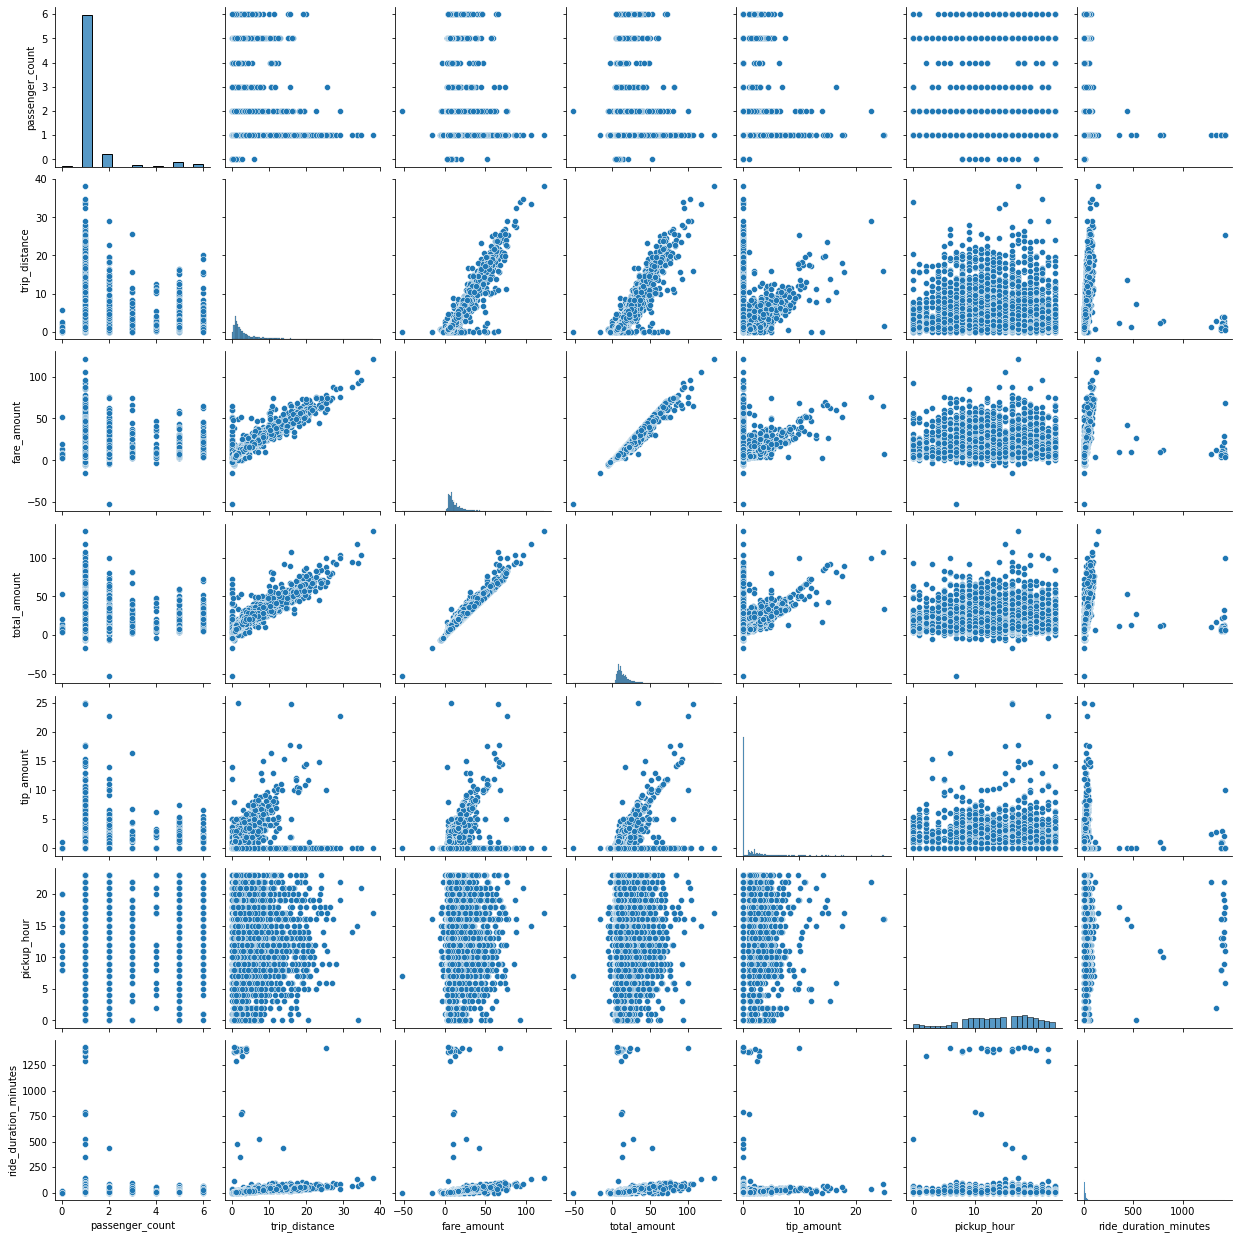

In [24]:
fig = sns.pairplot(df)
fig.savefig("output.png")

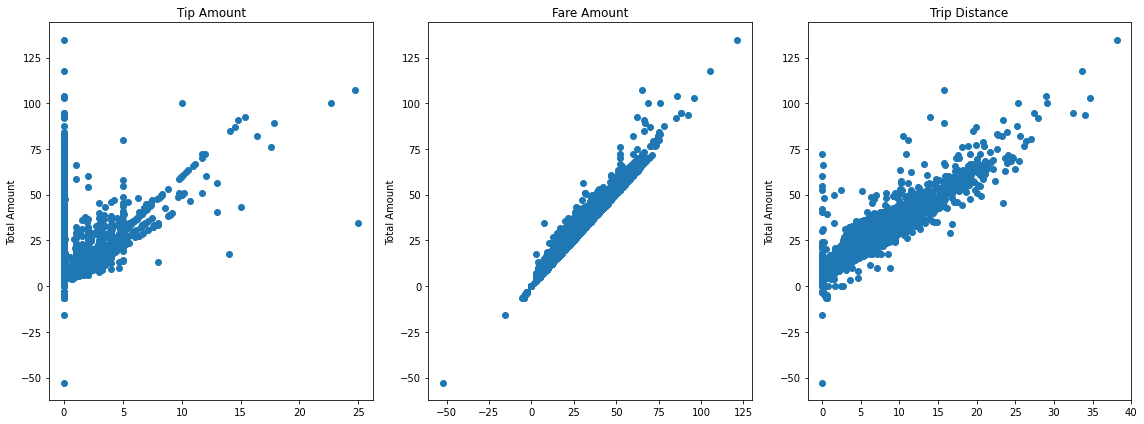

In [25]:
##Beispiel mit Matplotlib
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6)) ## 1 Zeile mit 3 Spalten
axes[0].plot(df['tip_amount'],df['total_amount'],'o')
axes[0].set_ylabel("Total Amount")
axes[0].set_title("Tip Amount")

axes[1].plot(df['fare_amount'],df['total_amount'],'o')
axes[1].set_ylabel("Total Amount")
axes[1].set_title("Fare Amount")

axes[2].plot(df['trip_distance'],df['total_amount'],'o')
axes[2].set_ylabel("Total Amount")
axes[2].set_title("Trip Distance")

plt.tight_layout()

In [26]:
X = df[['trip_distance', 'pickup_hour', 'ride_duration_minutes']] ##Definieren der Labels
X

,trip_distance,pickup_hour,ride_duration_minutes
0,1.61,0,8
1,0.16,0,0
2,7.49,1,15
3,0.70,0,2
4,3.51,1,8
...,...,...,...
5751,3.89,23,20
5752,1.71,23,9
5753,4.51,23,16
5754,0.80,23,3


In [28]:
y = df['tip_amount']
y

0       2.79
1       0.00
2       5.95
3       0.00
4       3.99
        ... 
5751    3.56
5752    0.00
5753    3.56
5754    0.00
5755    0.00
Name: tip_amount, Length: 5756, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42) #Definieren der Train-Test-Aufteilung

In [39]:
len(X_test)

1152

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [54]:
prediction = model.predict(X_test)
type(prediction)

numpy.ndarray

In [57]:
np.set_printoptions(threshold=sys.maxsize)
prediction

array([0.80962732, 0.47717895, 0.85200228, 0.68351093, 1.05086709,
       0.64642938, 0.85309294, 0.81842389, 0.80295722, 0.66473896,
       1.02727887, 0.78655668, 0.68045349, 0.63915543, 0.79637394,
       0.80875119, 0.77502978, 0.7924799 , 0.85284197, 0.88257497,
       0.99652417, 1.04948303, 0.99788692, 0.8638623 , 0.84489867,
       0.81717355, 0.87144961, 1.26447611, 0.80735783, 0.77817695,
       0.77392537, 0.75148454, 0.51540135, 0.68066647, 0.73663549,
       0.61045069, 0.91204188, 0.74597971, 0.57772556, 0.48607746,
       0.81372368, 0.49751617, 0.86253599, 0.91433268, 0.73985572,
       0.87392142, 1.19584982, 0.71391328, 1.24207928, 0.84281483,
       0.96973138, 1.08973579, 0.90016965, 0.76133069, 0.94619525,
       0.69834623, 0.85368613, 1.29190628, 0.78775373, 0.61910269,
       1.27998076, 0.51665015, 0.88378732, 1.64251966, 0.87556418,
       0.6912746 , 1.09331975, 0.72291062, 0.78524858, 0.82530987,
       0.76449297, 0.72963691, 0.94966953, 0.8174747 , 0.61802

## Evaluation

Wir haben nun ein trainiertes Modell. Aber: Ist es gut??

<img src="https://i.imgur.com/19LNbyQ.jpg" alt="MAE"
	title="MAE" width="500" />
    
Source: https://stackoverflow.com/questions/56401346/mean-absolute-error-in-tensorflow-without-built-in-functions/56401550

Problem: Wenn nur einzelne Werte extrem abweichen würde das nicht erkannt werden......

Besser: Mean Squared Error (MSE): Durch das Quadrat werden einzelne starke Abweichungen stärker "bestraft"

<img src="https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG" alt="MAE"
	title="MAE" width="500" />

<img src="https://miro.medium.com/max/483/1*lqDsPkfXPGen32Uem1PTNg.png" alt="MAE"
	title="MAE" width="500" />


Root Mean Square Error: Bestraft einzelne starke Abweichungen stärker und zieht dann die Wurzel um die original Einheiten zu bekommen. Diese Variante wird oft verwendet.

## Frage: Was ist ein guter RMSE und was nicht?

Antwort: Es kommt drauf an.

Ein RMSE von 50€ wäre gut um z.B. den Preis einer Immobilie zu schätzen aber nicht für die Schätzung des Preises von Schokolade

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [66]:
df['tip_amount'].mean()

0.874107018763033

In [69]:
np.sqrt(mean_squared_error(y_test, prediction))

1.7868837311232435

Sehr schlechter Wert im Vergleich zum Durchschnittlichen Wert von tip_amount --> Kein gutes Modell 

## Cross Validation, Grid Search

- Viele ML Algorithmen sind mit Parametern anpassbar. Frage: Welche Parameter liefern die besten Ergebnisse?

- Idee: Ich stelle einen Parameter ein und trainiere das Modell und teste mit den Testdaten.

- Es ist nicht gut wenn z.B. stets die letzten 20% der Daten als Testdaten verwendet werden. Es kann sein, dass das trainierte Modell mit diesen Daten zufällig sehr gut oder sehr schlecht läuft.

- Kompletter Datensatz wird aufgeteilt in Training, Validation und Test. Der Test-Datensatz wird erst verwendet, wenn die Finalen Parameter gefunden wurden.

### k-fold Cross Validation
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1920px-K-fold_cross_validation_EN.svg.png" alt="MAE"
	title="MAE" width="500" />

1. Parameter des ML-Algos werden festgelegt.
2. Es werden k-Iterationen ausgeführt mit jeweils verschiedenen Test- und Trainingsdaten.
3. Error jeder Iteration wird berechnet.
4. Durschnitts-Error aller Iterationen bewertet die aktuelle Parameterkonfiguration des ML-Algos
5. Parameter verändern und Schritte 1 bis 4 wiederholen

In [ ]:
from sklearn.model_selection import cross_val_score
model = MLAlgo(paramter=xx)
score = cross_val_score(model, X_train, y_train, scoring='mean_squared_error', cv=5)

## Danach Durchschnitt der Fehler berechnen und dann für nächsten Parameter des ML Algos wiederholen

## Grid Search 

Bisher mussten Parameter des Algorithmus händisch angepasst werden. GridSearchCV automatisiert dies indem eine Liste an Parametern übergeben werden kann. Am Schluss lässt sich die Konfiguration anzeigen, die die beste Schätzungen geliefert hat.

In [ ]:
from sklearn import LogisticRegression
base_model = LogisticRegression()
param_grid = {'param1':[0.1, 0.2, ...], 'param2':[0.4,0.5,...] }

from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(base_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_model.fit(X_train, y_train)

grid_model.best_estimator